# Manual Implemenation of SGD for linear regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import random

In [557]:
X = load_boston().data
Y = load_boston().target

In [558]:
from sklearn.model_selection import train_test_split
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data

In [559]:
scaler = preprocessing.StandardScaler().fit(X)
x_std = scaler.transform(X)

## Sklearn's SGD:

In [561]:
clf = SGDRegressor(max_iter=10000,random_state=45)
clf.fit(x_std, Y)
print(mean_squared_error(Y, clf.predict(x_std)))

21.9476366800158


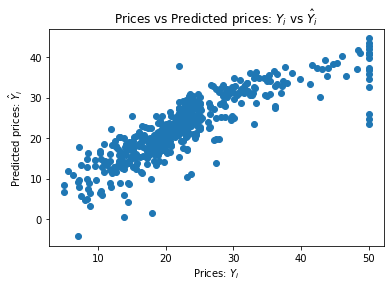

In [564]:
Y_pred = clf.predict(x_std)

plt.scatter(Y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

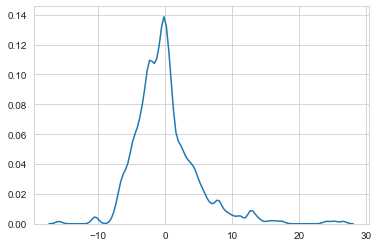

In [565]:
delta_y = Y - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

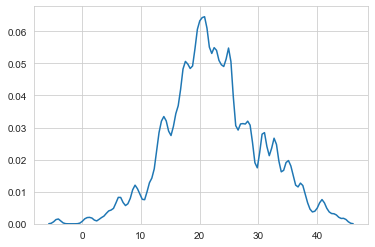

In [566]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

## Manual implementaion of SGD:

In [593]:
#https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression
def SGD_manual(x_std,Y):
    
    #initialization
    w_cur=np.zeros(shape=(1,13))
    b_cur=0
    
    r=0.001      #learning rate
    n_itr=10000  #number of iteration
    k=100        #batch size
    
    for j in range(n_itr):
        w_old=w_cur
        b_old=b_cur
        
        w_temp=np.zeros(shape=(1,13))
        b_temp=0
        
        #sampling the data for batch processing
        ran = random.sample(range(0, len(Y)),k) 
        x = np.array([x_std[i] for i in ran])
        y = np.array([Y[i] for i in ran])
                   
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        
        w_cur=w_old-r*w_temp
        b_cur=b_old-r*b_temp
        
        
        if(w_old==w_cur).all():
            break
        
    return w_cur,b_cur

In [577]:
w_best,b_best = SGD_manual(x_std_tr,Y_train)

In [578]:
y_manual=[]
for i in range(len(x_std)):
    y=np.asscalar(np.dot(w_best,x_std[i])+b_best)
    y_manual.append(y)

In [579]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MSE = mean_squared_error(Y,y_pred)

print(MSE)

22.61503002884054


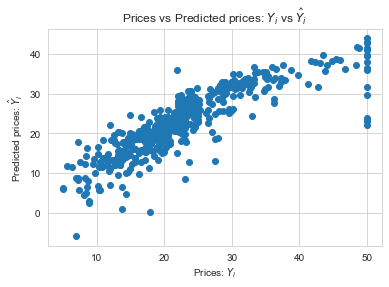

In [580]:
plt.scatter(Y, y_manual)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

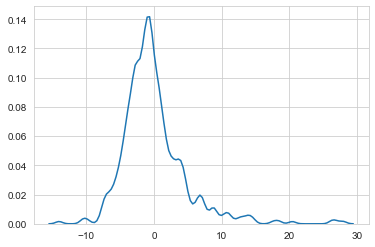

In [581]:
delta_y = Y - y_manual;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

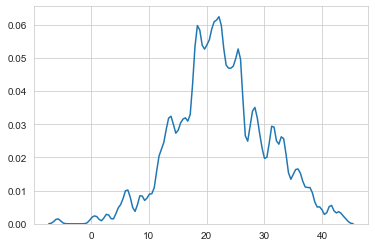

In [583]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_manual), bw=0.5)
plt.show()

## Conclution:

In [590]:
from prettytable import PrettyTable
table = PrettyTable()

# Adding columns
table.field_names = ["SGD Implementation","Mean Sq. error"]
table.add_row(["Sklearn's SGD", 21.95])
table.add_row(["Manual SGD", 22.61])

print(table)

+--------------------+----------------+
| SGD Implementation | Mean Sq. error |
+--------------------+----------------+
|   Sklearn's SGD    |     21.95      |
|     Manual SGD     |     22.61      |
+--------------------+----------------+


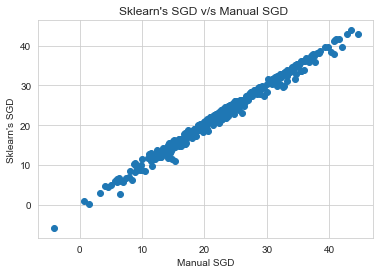

In [592]:
plt.scatter(Y_pred, y_manual)
plt.xlabel("Manual SGD")
plt.ylabel("Sklearn's SGD")
plt.title("Sklearn's SGD v/s Manual SGD ")
plt.show()

1. From the above comparision, we can say we have got approximately same values of the mean squared error in manual SGD implemenation as in the Sklearn's implementation.

2. We have got best results with the below values: 
   learning rate = 0.001
   number of iterations = 10000
   batch size = 100
   
3. From all the above plots we can say the implementation is almost close to the sklearn's implementation for SGD.